In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/train (2).csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Why do EDA

- Model building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- feature engineering
- detecting outliers

In [ ]:
# Remember it is an iterative process

### Column Types

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
- **Mixed** - Name, Ticket, Cabin

### Univariate Analysis

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

#### The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

#### **Dispersion** is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


# Age

**conclusions**

- Age is normally(almost) distributed
- 20% of the values are missing
- There are some outliers

In [ ]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

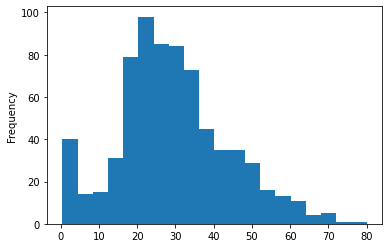

In [ ]:
df['Age'].plot(kind='hist',bins=20)

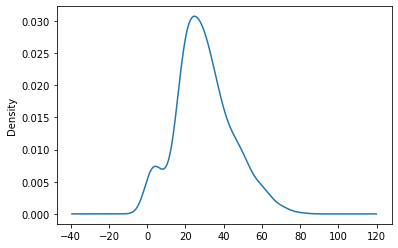

In [ ]:
df['Age'].plot(kind='kde')

In [ ]:
df['Age'].skew()

0.38910778230082704

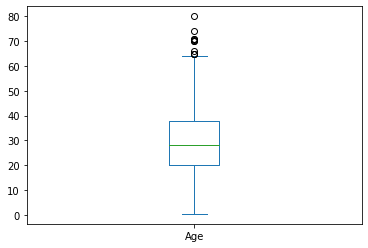

In [ ]:
df['Age'].plot(kind='box')

In [ ]:
df[df['Age'] > 65] # checking data of outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [ ]:
df['Age'].isnull().sum()/len(df['Age'])

0.20091673032849502

# Fare

**conclusions**

- The data is highly(positively) skewed
- Fare col actually contains the group fare and not the individual fare(This migth be and issue)
- We need to create a new col called individual fare

In [ ]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

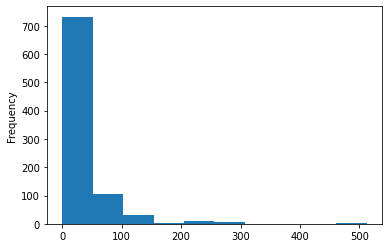

In [ ]:
df['Fare'].plot(kind='hist')

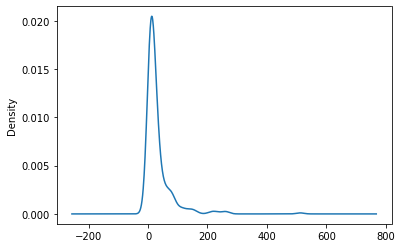

In [ ]:
df['Fare'].plot(kind='kde')

In [ ]:
df['Fare'].skew()

4.787316519674893

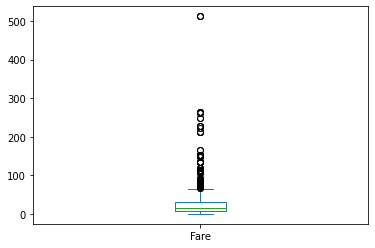

In [ ]:
df['Fare'].plot(kind='box')

In [ ]:
df[df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [ ]:
df['Fare'].isnull().sum()

0

### Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

#Survived

**conclusions**
- More the 60% passengers died.

In [ ]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

<Axes: >

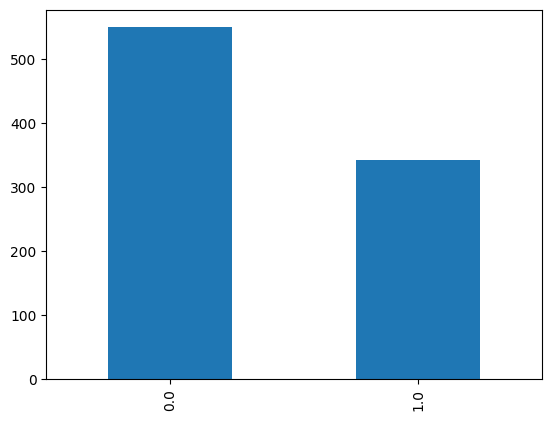

In [ ]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='Survived'>

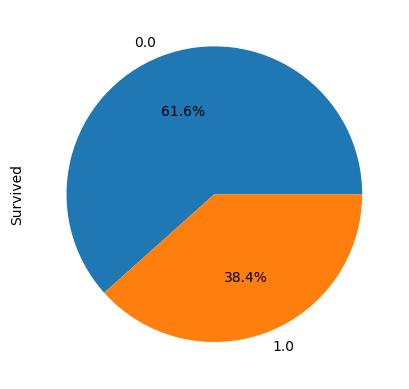

In [ ]:
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['Survived'].isnull().sum()

## Pclass

- More than 50% passengers belongs to Pclass.

In [ ]:
df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

<Axes: >

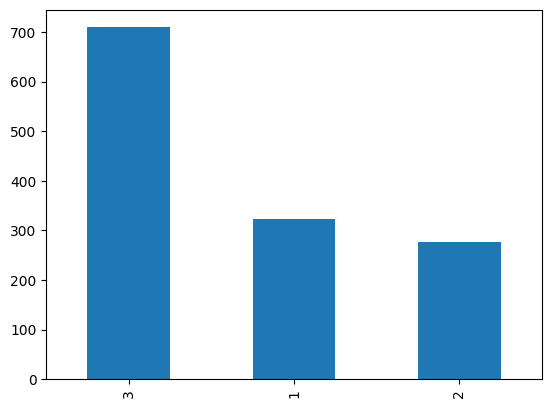

In [ ]:
df['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='Pclass'>

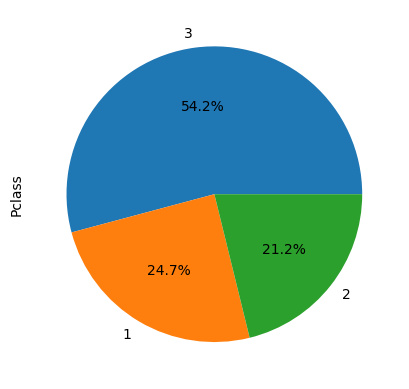

In [ ]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['Pclass'].isnull().sum()

0

## Sex

In [ ]:
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

<Axes: >

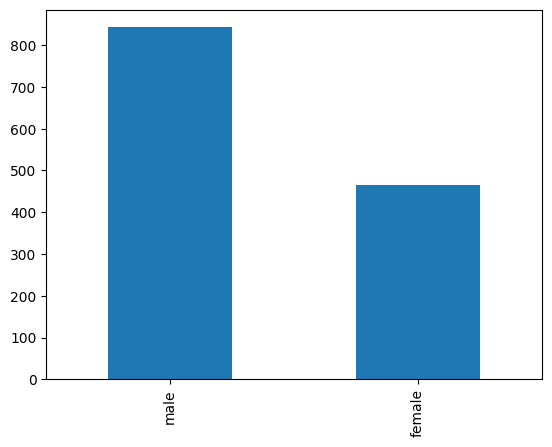

In [ ]:
df['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='Sex'>

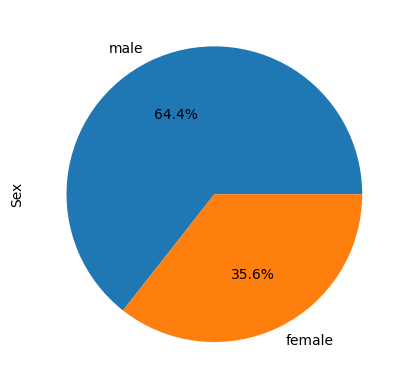

In [ ]:
df['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['Sex'].isnull().sum()

0

##SibSp

In [ ]:
df['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

<Axes: >

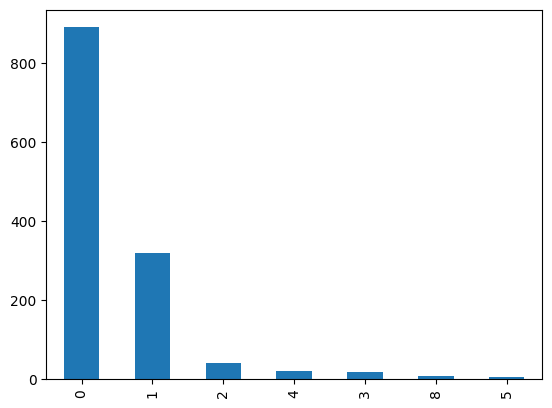

In [ ]:
df['SibSp'].value_counts().plot(kind='bar')

<Axes: ylabel='SibSp'>

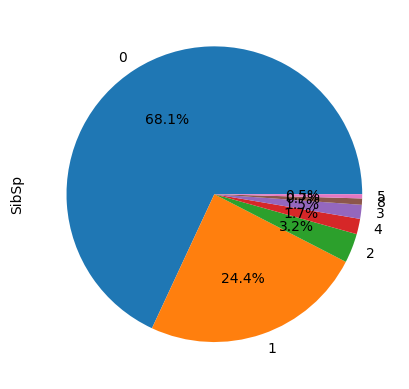

In [ ]:
df['SibSp'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['SibSp'].isnull().sum()

0

## Parch

**conclusions**

- Parch and SibSp cols can be merged to form  a new col call family_size
- Create a new col called is_alone

In [ ]:
df['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

<Axes: >

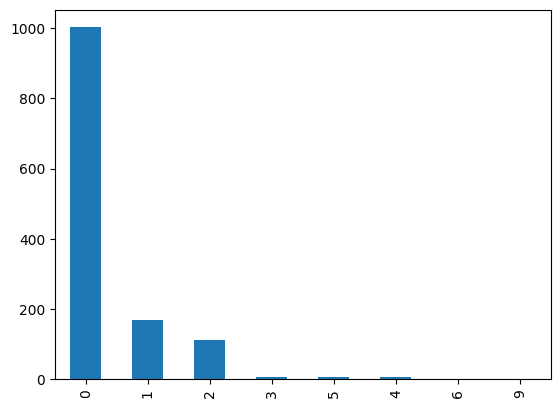

In [ ]:
df['Parch'].value_counts().plot(kind='bar')

<Axes: ylabel='Parch'>

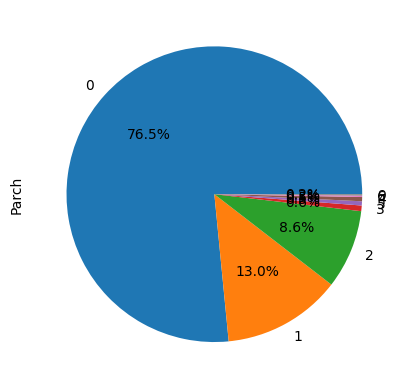

In [ ]:
df['Parch'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['Parch'].isnull().sum()

0

0

## Embarked

**conclusion**

- More than 70% passengers boarded from Southampton.

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

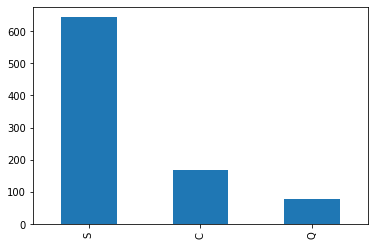

In [ ]:
df['Embarked'].value_counts().plot(kind='bar')

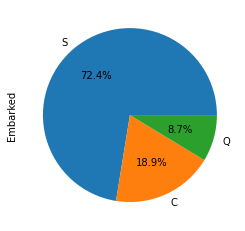

In [ ]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df['Embarked'].isnull().sum()

2

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname,title,deck
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,80.0,1,alone,Icard,Miss.,B
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,80.0,1,alone,Stone,Mrs.,B


In [ ]:
df['Embarked'].fillna('S',inplace=True)

In [ ]:
df['Embarked'].isnull().sum()

0

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname,title,deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S,3.62500,2,small,Braund,Mr.,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small,Cumings,Mrs.,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S,7.92500,1,alone,Heikkinen,Miss.,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small,Futrelle,Mrs.,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S,8.05000,1,alone,Allen,Mr.,M


# Survived Vs Pclass

In [ ]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0.0,37.037037,52.717391,75.763747
1.0,62.962963,47.282609,24.236253



Passengers in higher classes (Pclass 1) had the highest survival rate (62.96%), followed by Pclass 2 (47.28%) and Pclass 3 (24.24%). This data highlights the stark socioeconomic disparities aboard the Titanic, where higher-class passengers had significantly better chances of survival compared to those in lower classes.

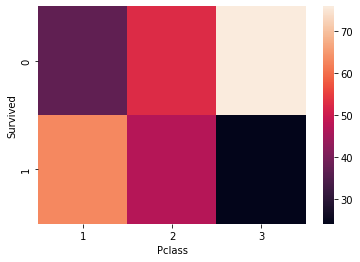

In [ ]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

# Survived Vs Sex

In [ ]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815



In statistical terms, the data indicates a significant association between gender and survival on the Titanic. Females had a much higher survival rate (74.20%) compared to males (18.89%). This suggests a strong correlation between gender and survival, highlighting the influence of gender-based evacuation protocols during the disaster.

# Survived Vs Embarked

In [ ]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652



The data shows that passengers who boarded from Cherbourg had a slightly higher chance of survival compared to those from Queenstown and Southampton. However, it's essential to remember that this doesn't mean where they boarded directly caused their survival; there could be other factors involved.

In [ ]:
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [ ]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665



The data suggests that the port of embarkation may have some correlation with passenger class and subsequently, survival rates. For instance, among passengers in the first class (Pclass 1), those embarking from Cherbourg (C) had the highest survival rate at 50.60%, followed by those from Southampton (S) at 19.97%, and Queenstown (Q) at 2.60%. In contrast, for passengers in the second class (Pclass 2), those embarking from Southampton had the highest survival rate at 25.39%, followed by Queenstown at 3.90%, and Cherbourg at 10.12%. Finally, for passengers in the third class (Pclass 3), those embarking from Queenstown had the highest survival rate at 93.51%, followed by Southampton at 54.64%, and Cherbourg at 39.29%. These variations suggest a potential interplay between passenger class, port of embarkation, and survival rates, although further analysis is needed to determine the exact relationship.



# Survived Vs Age

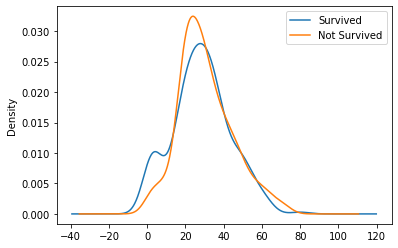

In [ ]:
# survived and age

df[df['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

- between 5 to 15 age group there are high chance of survival.
- between 20 to 30 age group there are low survuval rate because they are adlut.
- near to age 40 the blue line is dominating maybe because the mean age of pclass 1 is near to 40.

In [ ]:
df[df['Pclass'] == 1]['Age'].mean()

38.233440860215055

yes..the mean age of Pclass 1 is near to 40.

# Feature Engineering

###**Feature Engineering on Fare col**

In [ ]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


it shows that there are 11 members those have ticket 'CA. 2343' but only 8 members are present in train dataset..maybe the rest members  are in test_dataset

In [ ]:
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
df1 = pd.read_csv('/content/test (1).csv')

In [ ]:
df = pd.concat([df,df1])

In [ ]:
df[df['Ticket'] == 'CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0.0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0.0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0.0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0.0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S
139,1031,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S
140,1032,NaN,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S


In [ ]:
# Creating new column `indiviadual_fare`
df['individual_fare'] = df['Fare']/(df['SibSp'] + df['Parch'] + 1)

<Axes: >

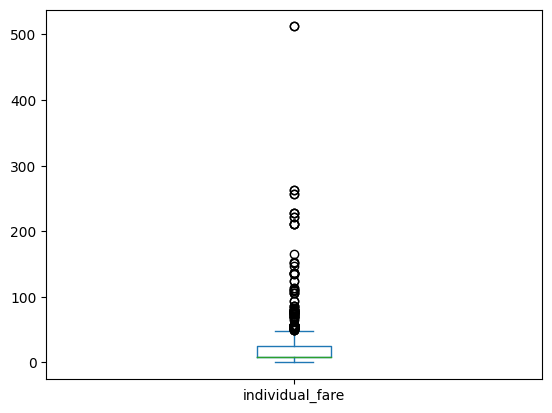

In [ ]:
# univariate analysis on individual_fare
df['individual_fare'].plot(kind='box')

In [ ]:
df[['individual_fare','Fare']].describe()

,individual_fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000


In [ ]:
# creating new column 'Family_size'
df['family_size'] = df['SibSp'] + df['Parch'] + 1

In [ ]:
# family_type
# 1 -> alone
# 2-4 -> small
# >5 -> large

def transform_family_size(num):

  if num == 1:
    return 'alone'
  elif num>1 and num <5:
    return "small"
  else:
    return "large"

In [ ]:
# creating new column 'Family_Type'
df['family_type'] = df['family_size'].apply(transform_family_size)

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,alone


## Survived Vs Family_type


In [ ]:
pd.crosstab(df['Survived'],df['family_type'],normalize='columns')*100

family_type,alone,large,small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712



Traveling alone was associated with higher mortality rates (69.65%), while being part of a small family increased the chances of survival (57.88%). Large families had the lowest survival rate (16.13%), indicating that family size played a role in survival during the Titanic disaster.






In [ ]:
# Featur engineering on 'Name' column.

df['surname'] = df['Name'].str.split(',').str.get(0)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,small,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,alone,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,alone,Allen


In [ ]:
df['surname'].value_counts()

Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
             ..
Milling       1
Maisner       1
Goncalves     1
Campbell      1
Saether       1
Name: surname, Length: 875, dtype: int64

In [ ]:
# Creating new column 'title'.

df['title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,small,Braund,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small,Cumings,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,alone,Heikkinen,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small,Futrelle,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,alone,Allen,Mr.


In [ ]:
df['title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: title, dtype: int64

In [ ]:
df['title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: title, dtype: int64

In [ ]:
df['title'] = df['title'].str.replace('Rev.','other')
df['title'] = df['title'].str.replace('Dr.','other')
df['title'] = df['title'].str.replace('Col.','other')
df['title'] = df['title'].str.replace('Major.','other')
df['title'] = df['title'].str.replace('Capt.','other')
df['title'] = df['title'].str.replace('the','other')
df['title'] = df['title'].str.replace('Jonkheer.','other')
df['title'] = df['title'].str.replace('Don.','Mrs.')
df['title'] = df['title'].str.replace('Mme.','Mrs.')
df['title'] = df['title'].str.replace('Mlle.','Miss.')
df['title'] = df['title'].str.replace('Sir.','Mr.')
df['title'] = df['title'].str.replace('Lady.','Miss.')
df['title'] = df['title'].str.replace('Ms.','other')

# ,'Dr.','Col.','Major.','Don.','Capt.','the','Jonkheer.']

<ipython-input-42-8f7562ba374b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Rev.','other')
<ipython-input-42-8f7562ba374b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Dr.','other')
<ipython-input-42-8f7562ba374b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Col.','other')
<ipython-input-42-8f7562ba374b>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Major.','other')
<ipython-input-42-8f7562ba374b>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Capt.','other')
<ipython-input-42-8f7562ba374b>:7: FutureWarning: The default value of re

In [ ]:
df['title'].value_counts()

Mr.        758
Miss.      263
Mrs.       199
Master.     61
ootherr     23
other        4
Mrs..        1
Name: title, dtype: int64

In [ ]:
df['title'] = df['title'].str.replace('ootherr','other')
df['title'] = df['title'].str.replace('Mrs..','Mrs.')


<ipython-input-44-5e6c0a6a8c1f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Mrs..','Mrs.')


In [ ]:
df['title'].value_counts()

Mr.        758
Miss.      263
Mrs.       200
Master.     61
other       27
Name: title, dtype: int64

## Survived Vs title

In [ ]:
pd.crosstab(df['Survived'],df['title'],normalize='columns')*100

title,Master.,Miss.,Mr.,Mrs.,other
Survived,,,,,
0.0,42.5,29.72973,84.169884,21.259843,66.666667
1.0,57.5,70.27027,15.830116,78.740157,33.333333



"Master" and "Miss" titles had higher survival rates (57.5% and 70.27%) compared to "Mr." (15.83%). "Mrs." had the highest survival rate (78.74%), while "other" titles had a moderate rate (33.33%). This suggests that being a child or a  woman increased survival chances, while adult males had lower survival rates during the Titanic disaster.



### **Feature Engineering on `Cabin` column**

In [ ]:
df['Cabin'].isnull().sum()/len(df['Cabin'])

0.774637127578304

In [ ]:
df['Cabin'].fillna('Missing',inplace=True)

In [ ]:
df['Cabin'].value_counts()

Missing            1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: Cabin, Length: 187, dtype: int64

In [ ]:
df['Cabin'] = df['Cabin'].str.replace('Missing.','M')

<ipython-input-54-2c90e9d2c789>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cabin'] = df['Cabin'].str.replace('Missing.','M')


In [ ]:
#creating a new column 'deck' which tells about the deck number of cabin
df['deck'] = df['Cabin'].str[0]

In [ ]:
df['deck'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: deck, dtype: int64

## Deck Vs Pclass

In [ ]:
pd.crosstab(df['deck'],df['Pclass'])

Pclass,1,2,3
deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


## Survived Vs deck

In [ ]:
pd.crosstab(df['Survived'],df['deck'],normalize='columns')*100

deck,A,B,C,D,E,F,G,M,T
Survived,,,,,,,,,
0.0,53.333333,25.531915,40.677966,24.242424,25.0,38.461538,50.0,70.014556,100.0
1.0,46.666667,74.468085,59.322034,75.757576,75.0,61.538462,50.0,29.985444,0.0



Passengers on decks B, D, and E had the highest survival rates (ranging from 74.47% to 75.76%), while those on decks T and M had the lowest survival rates (0% and 29.99% respectively). This indicates that the deck location played a significant role in determining survival during the Titanic disaster.


here in A deck passengers from Pclass 1. why there are low survival rate?

<Axes: xlabel='deck'>

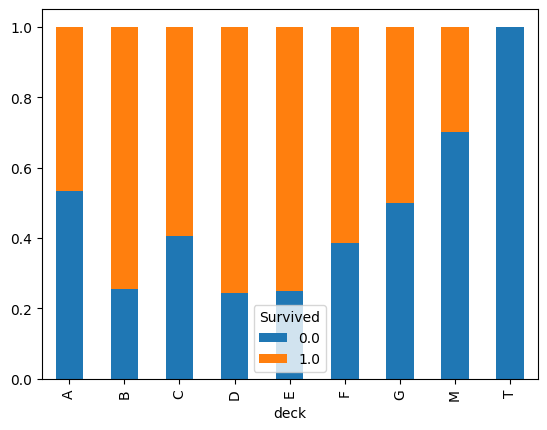

In [ ]:
pd.crosstab(df['deck'],df['Survived'],normalize='index').plot(kind='bar',stacked=True)

In [ ]:
df[df['deck']=='A']['title'].value_counts()

Mr.        15
Miss.       3
other       2
Master.     1
Mrs.        1
Name: title, dtype: int64

In [ ]:
df[df['deck']=='A']['family_type'].value_counts()

alone    17
small     5
Name: family_type, dtype: int64


The low survival rate on deck A may be because it had a higher proportion of passengers with the title "Mr." and traveling alone, both of which are associated with lower survival rates.

#**Summary**

- First-class passengers, women, children ("Master" and "Miss" titles), and those on certain decks (B, D, and E) had better chances of surviving.
-Third-class passengers, men, adults ("Mr." title), those traveling alone, and passengers on other decks (T and M) had lower chances of surviving.
- Traveling with a small family increased survival chances, while larger families or traveling alone decreased survival rates.
-Children with titles "Master" and "Miss" had better survival rates compared to adults with titles "Mr." or "Mrs."
-Passengers on certain decks (B, D, and E) had better survival rates than those on other decks (T and M).
-Those who boarded from Cherbourg had better survival rates compared to those from Southampton and Queenstown
